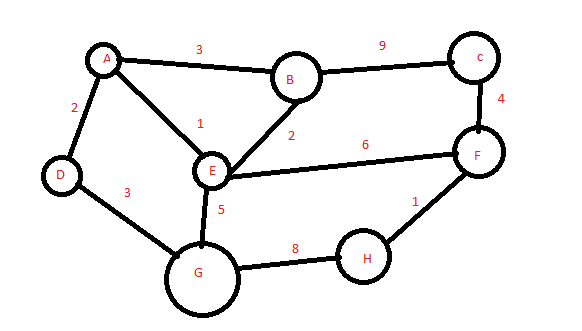

In [7]:
import collections

In [24]:
import string

In [53]:
nodes = string.ascii_uppercase[:8]

khởi tạo đồ thị

['A', 'B', 3] có nghĩa là điểm đầu A, điểm đích B, khoảng cách 3

In [3]:
edges = [
    ['A', 'B', 3],
    ['A', 'D', 2],
    ['A', 'E', 1],
    ['B', 'A', 3],
    ['B', 'E', 2],
    ['B', 'C', 9],
    ['C', 'B', 9],
    ['C', 'F', 4],
    ['D', 'A', 2],
    ['D', 'G', 3],
    ['E', 'A', 1],
    ['E', 'B', 2],
    ['E', 'F', 6],
    ['E', 'G', 5],
    ['F', 'E', 6],
    ['F', 'C', 4],
    ['F', 'H', 1],
    ['G', 'D', 3],
    ['G', 'E', 5],
    ['G', 'H', 8]
]

chuyển đồ thị sang dạng danh sách cho dễ quản lí

In [10]:
graph = collections.defaultdict(list)

In [12]:
for edge in edges:
    src, des, weight = edge
    graph[src].append((des, weight))

In [13]:
graph

defaultdict(list,
            {'A': [('B', 3), ('D', 2), ('E', 1)],
             'B': [('A', 3), ('E', 2), ('C', 9)],
             'C': [('B', 9), ('F', 4)],
             'D': [('A', 2), ('G', 3)],
             'E': [('A', 1), ('B', 2), ('F', 6), ('G', 5)],
             'F': [('E', 6), ('C', 4), ('H', 1)],
             'G': [('D', 3), ('E', 5), ('H', 8)]})

khởi tạo bảng độ dài từ gốc đến 1 điểm bất kì

path có dạng như sau:\
`defaultdict(list,
            {'A': inf,
             'B': inf, 
             'C': inf, 
             'D': inf, 
             'E': inf, 
             'F': inf, 
             'G': inf, 
             'H': inf})
`

In [129]:
def create_path():
    path = collections.defaultdict(list)
    
    for node in nodes:
        path[node] = float('inf')
    
    return path

khởi đầu bằng việc cho khoảng cách từ điểm đầu đến điểm đầu = 0 (hiển nhiên rồi :)))\
node_task sẽ là điều kiện kết thúc vòng lặp. Lúc đầu node_task gồm tất cả các đỉnh trừ đỉnh khởi đầu.\
sau mỗi vòng lặp node_task sẽ giảm đi 1 đỉnh. số vòng lặp là số đỉnh trong node_task

đỉnh để xét (queue) đầu tiên sẽ là đỉnh bắt đầu. queue sẽ được cập nhật lại sau mỗi vòng lặp.

trong mỗi vòng lặp của node_task có thêm một vòng lặp để xét quãng đường của mỗi đỉnh tới các đỉnh khác lân cận.\
nếu tổng khoảng cách từ đỉnh bắt đầu tới đỉnh hiện tại đang xét (queue) cộng thêm khoảng cách tới đỉnh lân cận, mà nhỏ hơn quãng đường từ đỉnh bắt đầu đến đỉnh lân cận này đã được tính trước đó thì sẽ lấy giá trị tổng này (vì nó ngắn hơn) và lưu vào path.\
cứ tiếp tục đến khi xét hết các đỉnh lân cận với queue.

sau đó tìm giá trị nhỏ nhất trong tất cả các giá trị ở trong path (tìm min_queue_len) và đỉnh tương ứng (min_queue), nhưng phải có ở trong node_task hiện tại để làm queue cho vòng lặp tiếp theo.

xóa đỉnh tương ứng queue hiện tại ra khỏi node_task. và tiếp tục vòng lặp.

In [130]:
def dijkstra(src, graph):
    path = create_path()
    
    nodes_task = nodes
    #quãng đường từ một điểm tới chính nó bằng 0
    path[src] = 0
    #bắt đầu xét quãng đường từ điểm khởi đầu tới các điểm xung quanh
    queue = src
    #xóa điểm bắt đầu khỏi chuỗi
    nodes_task = nodes_task.replace(src, '') 
    while len(nodes_task) > 0:
        for node in nodes_task:
            for i in range(len(graph[queue])):
                #nếu có đường đi từ điểm đang xét đến các điểm lân cận 
                #và quãng đường từ điểm mốc đến điểm lân cận này nhỏ hơn quãng đường đã có trước đó thì lấy giá trị nhỏ hơn
                if graph[queue][i][0] == node and graph[queue][i][1] + path[queue] < path[node]:
                    path[node] = graph[queue][i][1] + path[queue]
        min_queue = nodes_task[0]
        min_queue_len = path[nodes_task[0]]
        for node in nodes_task:
            if path[node] < min_queue_len:
                min_queue_len = path[node]
                min_queue = node
        #xóa điểm vừa xét
        nodes_task = nodes_task.replace(queue, '')
        #điểm tiếp theo
        queue = min_queue
    return path

In [131]:
A_path = dijkstra('A', graph)

In [132]:
A_path

defaultdict(list,
            {'A': 0, 'B': 3, 'C': 11, 'D': 2, 'E': 1, 'F': 7, 'G': 5, 'H': 8})

In [133]:
B_path = dijkstra('B', graph)

In [134]:
B_path

defaultdict(list,
            {'A': 3, 'B': 0, 'C': 9, 'D': 5, 'E': 2, 'F': 8, 'G': 7, 'H': 9})